## Load from previous processing comparison

In [2]:
import os
import mxnet as mx
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_color_codes("pastel")

resultsCAD = r'Z:\Cristina\Section3\paper_notes_section3_MODIFIED\datasets'
grdperf_DEC = pd.read_csv(os.path.join(resultsCAD,'grdperf_DEC.csv'), index_col=0)
grdperf_SAE = pd.read_csv(os.path.join(resultsCAD,'grdperf_SAE.csv'), index_col=0)
print(grdperf_DEC)

       n_mu  cvorigXAUC  cvZspaceAUC_cvtrain  cvZspace_stdAUC_cvtrain  \
Zsize                                                                   
34        3        0.69             0.773958                 0.037140   
34        4        0.69             0.761415                 0.020337   
34        5        0.69             0.746370                 0.017510   
34        6        0.69             0.816598                 0.029340   
34        7        0.69             0.781169                 0.028171   
34        8        0.69             0.788786                 0.023948   
34        9        0.69             0.773639                 0.024514   
34       10        0.69             0.779825                 0.034705   
34       11        0.69             0.752863                 0.024552   
34       12        0.69             0.802899                 0.031373   
52        3        0.69             0.793885                 0.029320   
52        4        0.69             0.761184       

## Plot hyperparameter plots

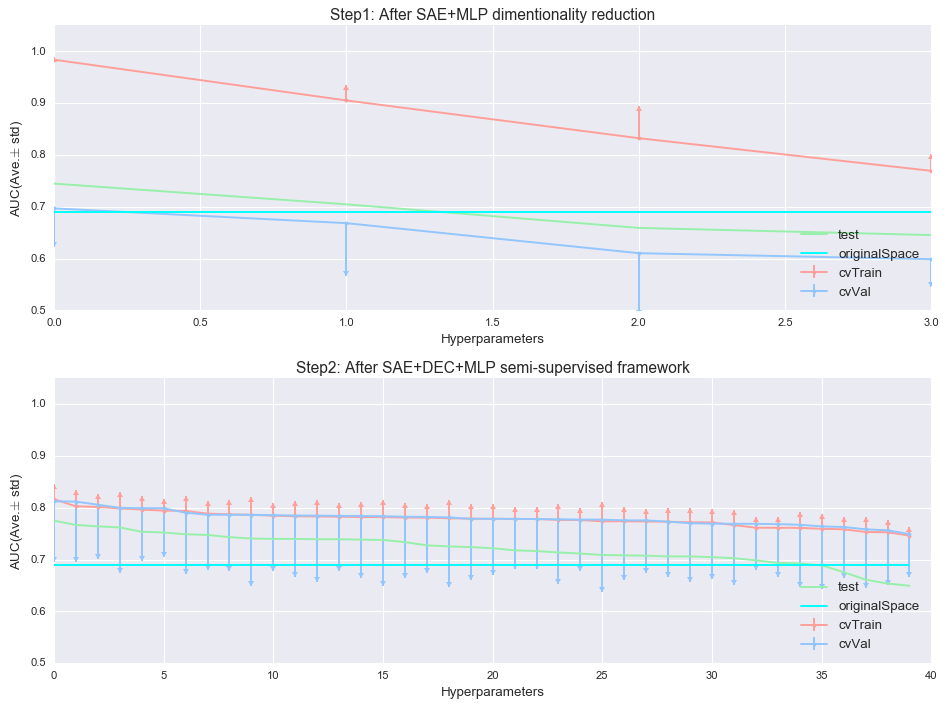

In [3]:
## plot
num_hyp= range(len(grdperf_SAE["cvorigXAUC"]))
figHyperp = plt.figure(figsize=(12,9))
axs1 = figHyperp.add_subplot(2,1,1)
axs2 = figHyperp.add_subplot(2,1,2)

# lower & upper limits of the error
lolims = np.ones(len(num_hyp)).astype(bool)
uplims = np.ones(len(num_hyp)).astype(bool)
ls = 'dotted'

# for cvAUC train
sortauc_Train = grdperf_SAE.sort_values(by='cvZspaceAUC_cvtrain',ascending=False)
# for cvAUC val
sortauc_Val = grdperf_SAE.sort_values(by='cvZspaceAUC_cvVal',ascending=False)
# sort TestAUC
sortauc_test = grdperf_SAE.sort_values(by='TestAUC',ascending=False)

# plot
axs1.errorbar(x=num_hyp, y=sortauc_Train['cvZspaceAUC_cvtrain'].values,  lolims=lolims,
              yerr=sortauc_Train["cvZspace_stdAUC_cvtrain"].values, fmt='.-r', label='cvTrain')
axs1.errorbar(x=num_hyp, y=sortauc_Val['cvZspaceAUC_cvVal'].values, uplims=uplims,
              yerr=sortauc_Train["cvZspace_stdAUC_cvVal"].values, fmt='.-b', label='cvVal')
axs1.plot(num_hyp, sortauc_test['TestAUC'].values, 'g', label='test')
axs1.plot(num_hyp, sortauc_test['cvorigXAUC'].values, 'cyan', label='originalSpace')
axs1.set_title('Step1: After SAE+MLP dimentionality reduction',fontsize=14)
axs1.set_xlabel('Hyperparameters',fontsize=12)
axs1.set_ylabel('AUC(Ave.$\pm$ std)',fontsize=12)
axs1.legend(loc="lower right",fontsize=12)
axs1.set_ylim(0.5,1.05)

# for cvAUC train wiht NXG ffeatures
num_hypDEC= range(len(grdperf_DEC["cvorigXAUC"]))
# lower & upper limits of the error
lolims = np.ones(len(num_hypDEC)).astype(bool)
uplims = np.ones(len(num_hypDEC)).astype(bool)
ls = 'dotted'
sortauc_Train = grdperf_DEC.sort_values(by='cvZspaceAUC_cvtrain',ascending=False)
# for cvAUC val
sortauc_Val = grdperf_DEC.sort_values(by='cvZspaceAUC_cvVal',ascending=False)
# sort TestAUC
sortauc_test = grdperf_DEC.sort_values(by='TestAUC',ascending=False)
# plot
axs2.errorbar(x=num_hypDEC, y=sortauc_Train['cvZspaceAUC_cvtrain'].values,  lolims=lolims, 
              yerr=sortauc_Train["cvZspace_stdAUC_cvtrain"].values, fmt='.-r', label='cvTrain')
axs2.errorbar(x=num_hypDEC, y=sortauc_Val['cvZspaceAUC_cvVal'].values, uplims=uplims,
              yerr=sortauc_Train["cvZspace_stdAUC_cvVal"].values, fmt='.-b', barsabove =True, label='cvVal')
axs2.plot(num_hypDEC, sortauc_test['TestAUC'].values, 'g', label='test')
axs2.plot(num_hypDEC, sortauc_test['cvorigXAUC'].values, 'cyan', label='originalSpace')
axs2.set_title('Step2: After SAE+DEC+MLP semi-supervised framework',fontsize=14)
axs2.set_xlabel('Hyperparameters',fontsize=12)
axs2.set_ylabel('AUC(Ave.$\pm$ std)',fontsize=12)
axs2.legend(loc="lower right",fontsize=12)
axs2.set_ylim(0.5,1.05)

figHyperp.tight_layout()